# M230 HW1

## Q2

1) Associative rule for addition says (x + y) + z == x + (y + z). Check association rule using x = 0.1, y = 0.1 and z = 1.0 in Julia. Explain what you find.

In [10]:
x = 0.1
y = 0.1
z = 1.0
a = 0.1
(x + y) + z == x + (y + z)

false

In [ ]:
(x + y) + z == x + (y + z)

In [7]:
@printf("%a",x)

0x1.999999999999ap-4

Associativity for addition is problematic due to floating point number representation.

2) Do floating-point numbers obey the associative rule for multiplication: (x * y) * z == x * (y * z)?

In [8]:
(x * y) * z == x * (y * z)

true

3) Do floating-point numbers obey the distributive rule: a * (x + y) == a * x + a * y?

In [11]:
a * (x + y) == a * x + a * y

true

4) Is 0 * x == 0 true for all floating-point number x?

In [12]:
0 * x == 0

true

In [13]:
0 * Inf == 0

false

No.

5) Is x / a == x * (1 / a) always true?

In [14]:
x / a == x * (1 / a)

true

In [15]:
x / Inf == x * (1 / Inf)

true

In [16]:
x / NaN == x * (1 / NaN)

false

In [ ]:
No.

## Q3

In [17]:
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

1) Use @code_llvm to find the LLVM bitcode of compiled g with Int64 input. Does the result surprise you?

In [18]:
@code_llvm g(Int64(1.0))


define i64 @julia_g_67294(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


As expected.

2) Use @code_llvm to find the LLVM bitcode of compiled g with Float64 input. Does the result surprise you?

In [20]:
@code_llvm g(Float64(2.0))


define double @julia_g_67297(double) #0 !dbg !5 {
top:
  %1 = fmul double %0, 5.000000e+00
  %2 = fadd double %1, -1.000000e+00
  %3 = fmul double %2, 5.000000e+00
  %4 = fadd double %3, -1.000000e+00
  %5 = fmul double %4, 5.000000e+00
  %6 = fadd double %5, -1.000000e+00
  %7 = fmul double %6, 5.000000e+00
  %8 = fadd double %7, -1.000000e+00
  %9 = fmul double %8, 5.000000e+00
  %10 = fadd double %9, -1.000000e+00
  %11 = fmul double %10, 5.000000e+00
  %12 = fadd double %11, -1.000000e+00
  %13 = fmul double %12, 5.000000e+00
  %14 = fadd double %13, -1.000000e+00
  %15 = fmul double %14, 5.000000e+00
  %16 = fadd double %15, -1.000000e+00
  %17 = fmul double %16, 5.000000e+00
  %18 = fadd double %17, -1.000000e+00
  %19 = fmul double %18, 5.000000e+00
  %20 = fadd double %19, -1.000000e+00
  ret double %20
}


It appears that the compiler unrolls the loop.

In [ ]:
3. Read Julia documentation on @fastmath and repeat the last question on the function

In [21]:
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

In [22]:
@code_llvm g_fastmath(Float64(2.0))


define double @julia_g_fastmath_67303(double) #0 !dbg !5 {
top:
  %1 = fmul fast double %0, 9.765625e+06
  %2 = fadd fast double %1, -2.441406e+06
  ret double %2
}


Loop is not unrolled. But Use @fastmath allows floating point optimizations that are correct for real numbers, but lead to differences for IEEE numbers.

## Q4

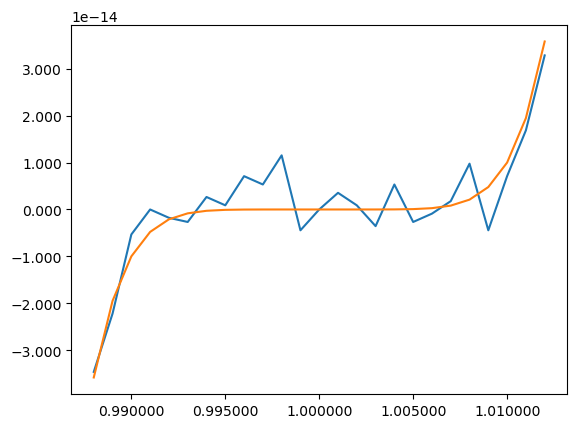

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b2a7628d0>

In [88]:
using PyPlot
x = collect(0.988:0.001:1.012)
y1 = x.^7 - 7 * x.^6 + 21 * x.^5 - 35 * x.^4 + 35 * x.^3 - 21 * x.^2 + 7 * x - 1
plot(x, y1)
y2 = (x - 1).^7
plot(x, y2)

Observe, polynomial expansion in first plot is suffering from insufficient floating point precision near 0.

## Q5

Read in the matrix in the file longley.txt on the macroeconomic data from 1947 to 1962. The columns are Employment, Prices, GNP, Jobless, Military, PopSize and Year. Plot the pairwise scatter plot between these variables. What do you observe?

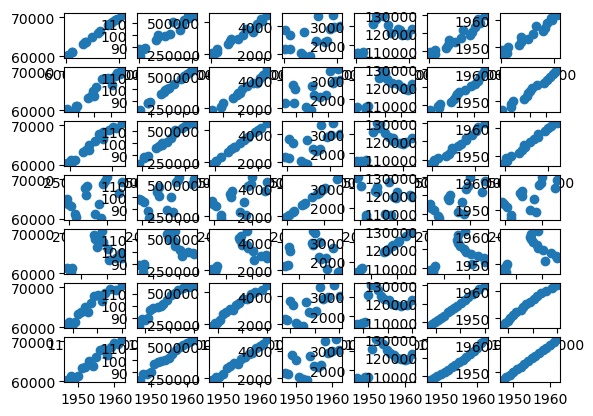

In [98]:
m = readdlm("/home/juser/M230/hw1/longley.txt")
using PyPlot
for r = 1:7
    for c = 1:7
        subplot(7,7,(r-1)*7 + c)
        scatter(m[:,r], m[:,c])
    end
end

Positive correlation between Employment, Prices, PopSize, Year.

## Q6

1)

H[i, j] = 1 / (i + j - 1)

In [33]:
function h1(n)
    H = zeros(n, n)
    for i = 1:n
        for j = 1:n
            H[i,j] = 1 / (i + j - 1)
        end
    end
    H
end

h1 (generic function with 1 method)

In [57]:
function h2(n)
    [ 1 / (i + j - 1) for i=1:n, j=1:n ]
end

h2 (generic function with 1 method)

In [58]:
function h3(n)
    col = reshape(repeat(1:n,inner=[n]),n,n)
    row = reshape(repeat(1:n,outer=[n]),n,n)
    1.0 ./ (row + col - 1)
end

h3 (generic function with 1 method)

In [59]:
h1(4)

4×4 Array{Float64,2}:
 1.0       0.5       0.333333  0.25    
 0.5       0.333333  0.25      0.2     
 0.333333  0.25      0.2       0.166667
 0.25      0.2       0.166667  0.142857

In [60]:
h2(4)

4×4 Array{Float64,2}:
 1.0       0.5       0.333333  0.25    
 0.5       0.333333  0.25      0.2     
 0.333333  0.25      0.2       0.166667
 0.25      0.2       0.166667  0.142857

In [62]:
h3(4)

4×4 Array{Float64,2}:
 1.0       0.5       0.333333  0.25    
 0.5       0.333333  0.25      0.2     
 0.333333  0.25      0.2       0.166667
 0.25      0.2       0.166667  0.142857

2)

In [74]:
using BenchmarkTools

@benchmark h1(1000)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     2.751 ms (0.00% GC)
  median time:      3.354 ms (0.00% GC)
  mean time:        3.471 ms (5.31% GC)
  maximum time:     75.799 ms (94.87% GC)
  --------------
  samples:          1436
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [75]:
@benchmark h2(1000)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     3.483 ms (0.00% GC)
  median time:      4.204 ms (0.00% GC)
  mean time:        4.334 ms (4.61% GC)
  maximum time:     74.753 ms (93.95% GC)
  --------------
  samples:          1151
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [76]:
@benchmark h3(1000)

BenchmarkTools.Trial: 
  memory estimate:  364.33 MiB
  allocs estimate:  19376520
  --------------
  minimum time:     822.406 ms (3.49% GC)
  median time:      882.409 ms (8.09% GC)
  mean time:        877.550 ms (8.19% GC)
  maximum time:     923.435 ms (12.45% GC)
  --------------
  samples:          6
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

3)

In [71]:
setrounding(Float64, RoundDown)
inv(h1(15))[1, 1]

159.01733081042767

In [72]:
setrounding(Float64, RoundUp)
inv(h1(15))[1, 1]

86.94928550720215